In [78]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("TSLA.csv")
print(df.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [27]:
df.shape


(2416, 7)

In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


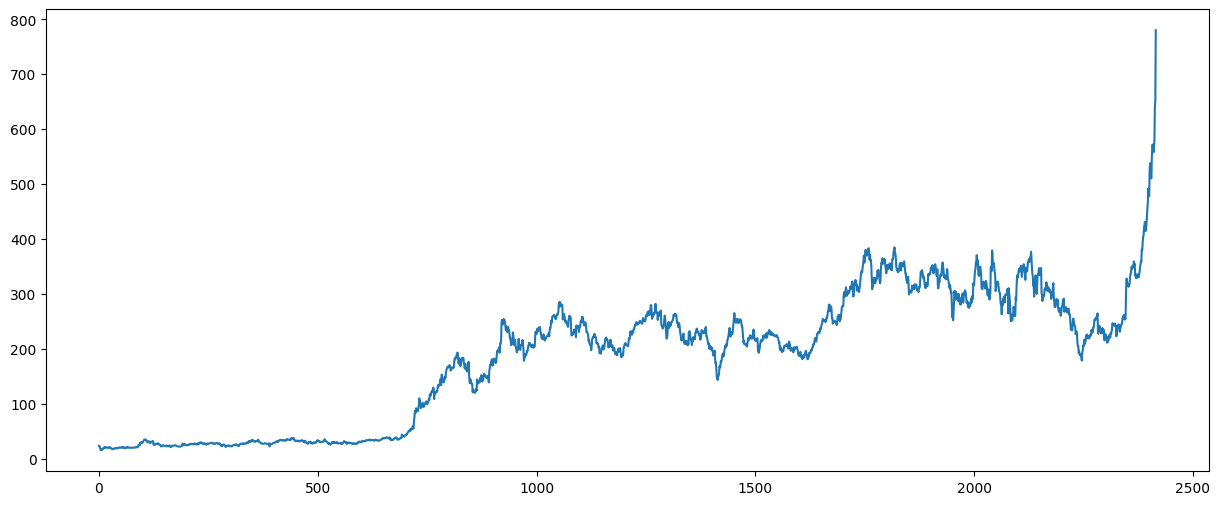

In [29]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'])
plt.show()

In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [31]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [33]:
df = df.drop(['Adj Close'], axis=1)

In [34]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

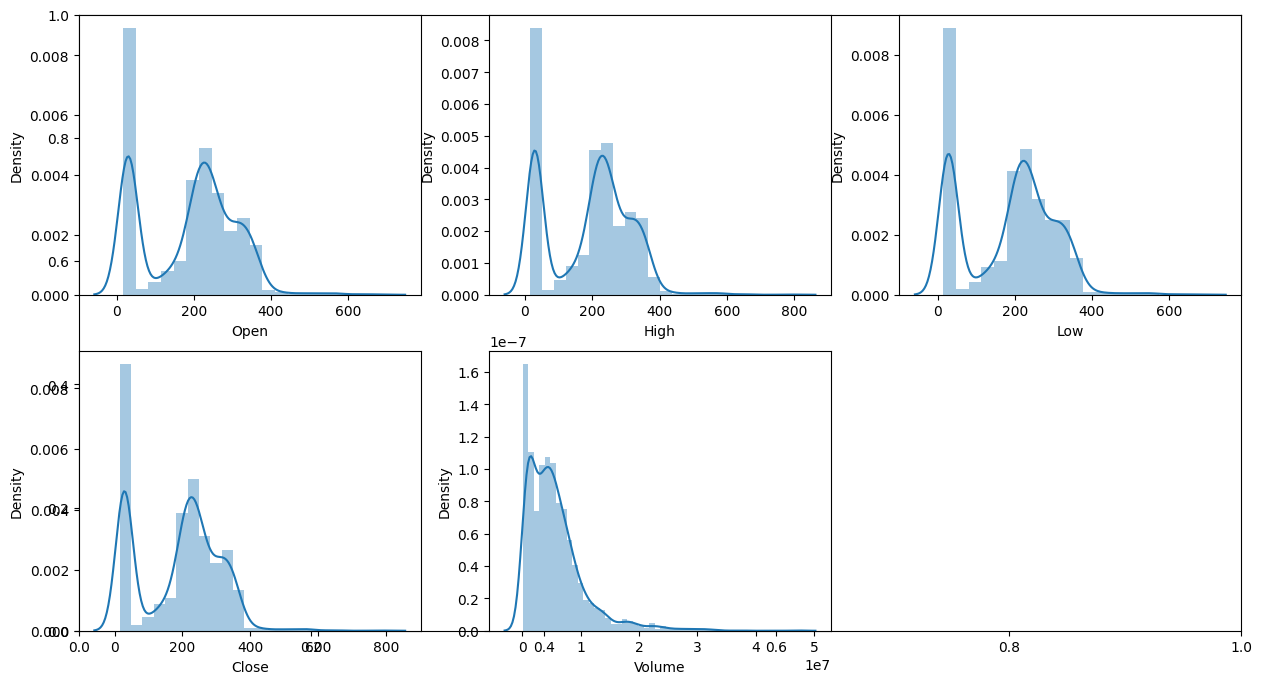

In [35]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
#Distribution Plot
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

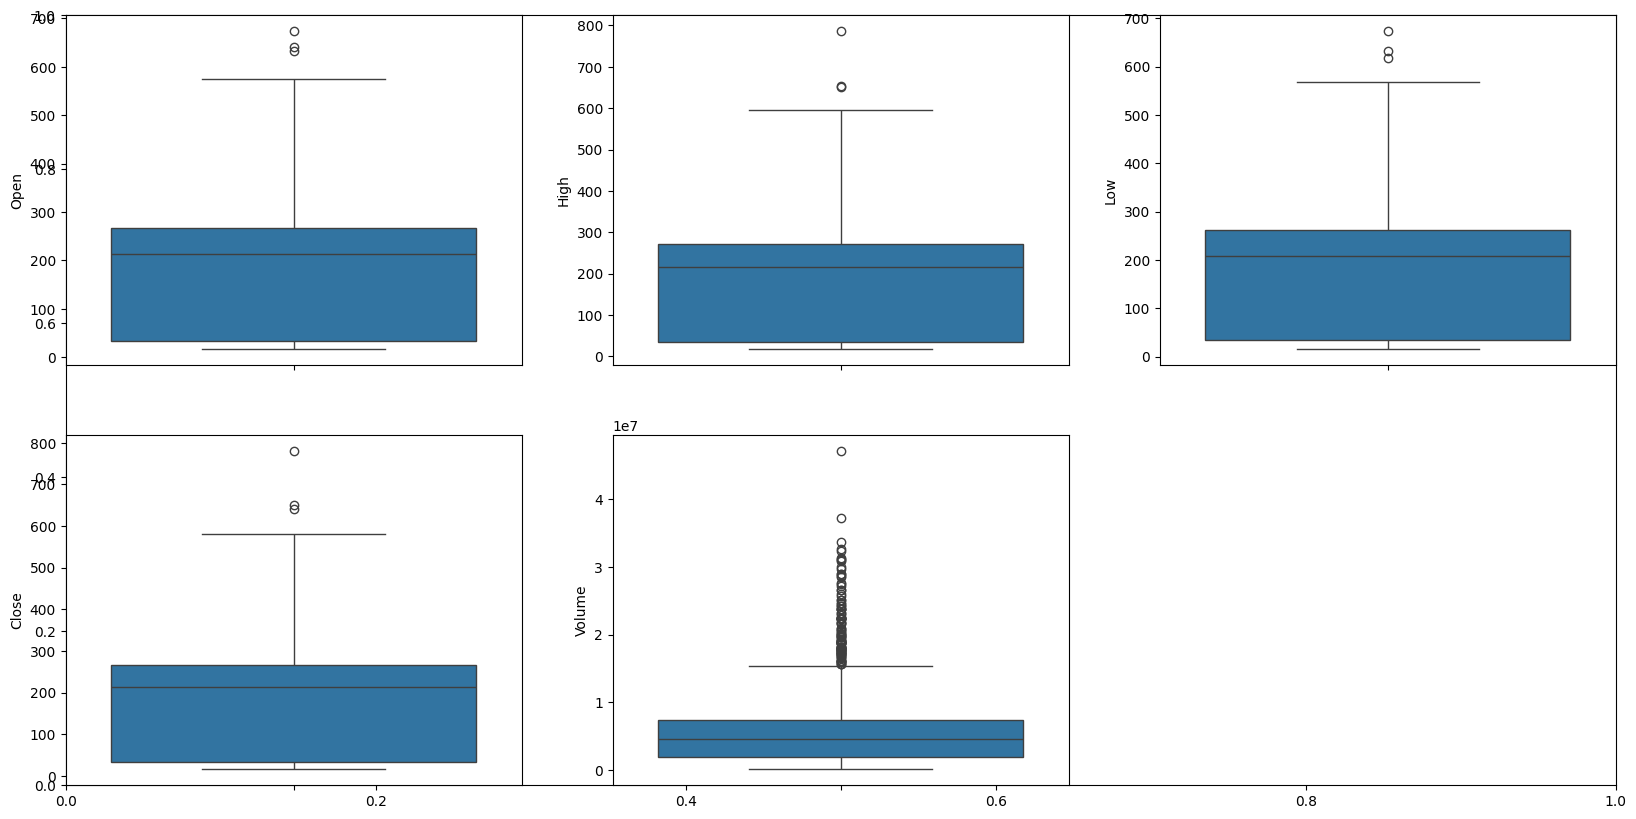

In [37]:
#BoxPlot
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [42]:
splitted = df['Date'].str.split('-', expand=True)
print(splitted)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
 
df.head()

         0   1   2
0     2010  06  29
1     2010  06  30
2     2010  07  01
3     2010  07  02
4     2010  07  06
...    ...  ..  ..
2411  2020  01  28
2412  2020  01  29
2413  2020  01  30
2414  2020  01  31
2415  2020  02  03

[2416 rows x 3 columns]


,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [43]:
#Check if it it quarter moth (divisible by 3)
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [48]:
df.dtypes

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
day                 int32
month               int32
year                int32
is_quarter_end      int32
dtype: object

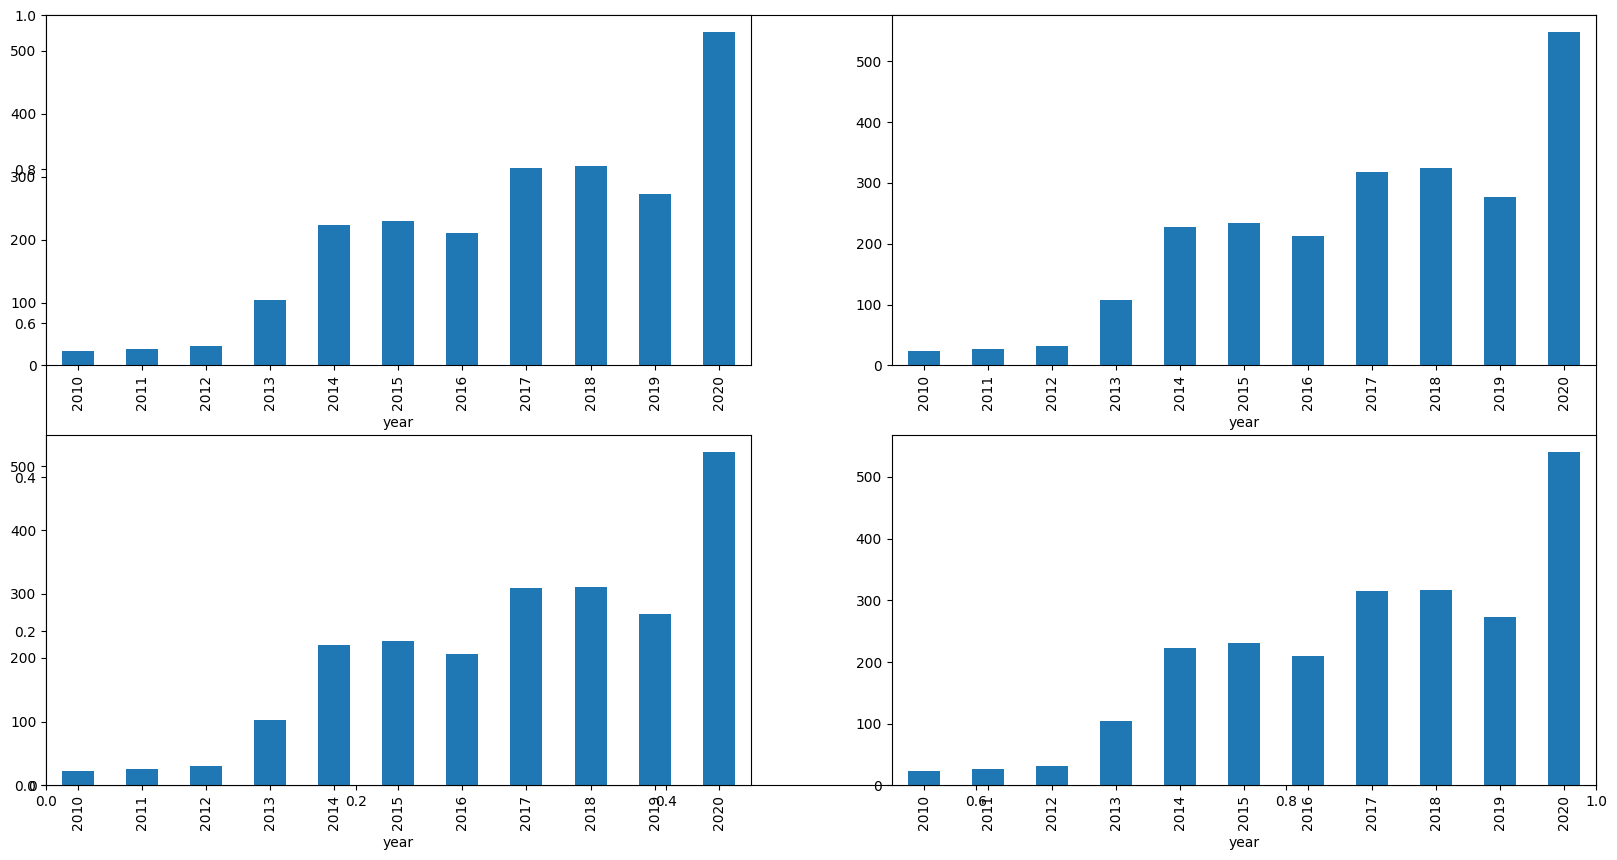

In [53]:
#Graph
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'day', 'month', 'year', 'is_quarter_end']
data_grouped = df.groupby('year')[numeric_columns].mean()

plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
plt.show()

In [60]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'day', 'month', 'year', 'is_quarter_end']
data_grouped = df.groupby('is_quarter_end')[numeric_columns].mean()
print(data_grouped)


                      Open        High         Low       Close        Volume  \
is_quarter_end                                                                 
0               185.875081  189.254226  182.449499  186.085081  5.767062e+06   
1               187.071200  190.232700  183.860262  187.047163  5.180154e+06   

                      day     month         year  is_quarter_end  
is_quarter_end                                                    
0               15.710396  6.173886  2014.816213             0.0  
1               15.825000  7.597500  2014.697500             1.0  


In [62]:
#Additional Coloumns 
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

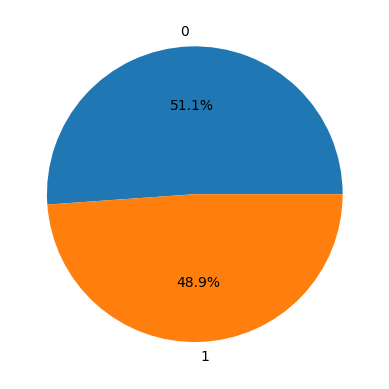

In [64]:
#Pie Chart
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

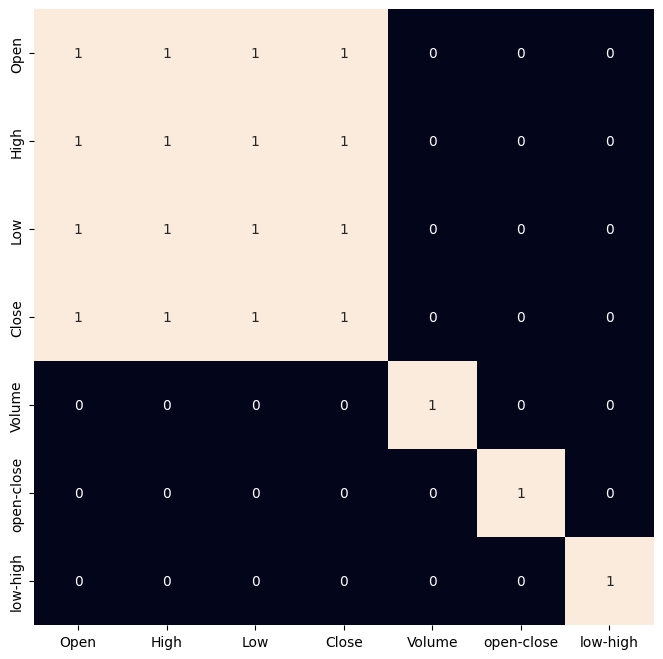

In [69]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])# only numeric coloumns
plt.figure(figsize=(8,8))
sb.heatmap(numeric_df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [70]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


Machine Learning Algorithms using scikit learn

In [75]:
#LogisticRegression
#Support Vector Machine
# XGBClassifier

models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    train_accuracy = roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])
    valid_accuracy = roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1])
    
    # Print results
    print(f'{type(model).__name__}():')
    print('Training Accuracy : ', train_accuracy)
    print('Validation Accuracy : ', valid_accuracy)
    print()

LogisticRegression():
Training Accuracy :  0.5229064800585902
Validation Accuracy :  0.49240558292282427

SVC():
Training Accuracy :  0.5294343760186608
Validation Accuracy :  0.4625068418171866

XGBClassifier():
Training Accuracy :  0.9382749759754802
Validation Accuracy :  0.4496784345922277



In [82]:
# from sklearn.metrics import confusion_matrix
# predictions = models[0].predict(X_valid)

# # Calculate confusion matrix
# cm = confusion_matrix(Y_valid, predictions)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Negative', 'Positive'],
#             yticklabels=['Negative', 'Positive'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()